# Defensive Coverage EDA 

In this file we perform the necessary exploratory data analysis on the 'comb_plays_track_data.csv' file to gather information on the coverage attributes of a NFL defense.  This shows the behavior of the data for the first 8 weeks of the nfl season. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#Read in the requisite file
new_df=pd.read_csv('comb_plays_track_data.csv')

/Users/andrewcastillo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
pd.set_option('display.max_columns', None)
new_df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,new_Id,defender,coverage_count,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN,2018090600_75,False,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,2018090600_75,True,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,2018090600_75,False,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,2018090600_75,True,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,2018090600_75,False,7,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False


# EDA for defensive coverages

In [8]:
#It seems that players that were most in coverage were 7 and 8. Note that this agrees with the mainly 
#nicklel formations that we saw in the plays_eda notebook. The last three coverages could be from hail mary types
#of situations. 
new_df.coverage_count.value_counts()

7     4157114
8     2229768
9     1412608
10     316033
11      50662
6       33260
5       10504
16       3047
14       1980
15       1320
Name: coverage_count, dtype: int64

In [9]:
# Analyze the features inside the the first 8 weeks of the data. 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216296 entries, 0 to 8216295
Data columns (total 47 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   time                    object 
 1   x                       float64
 2   y                       float64
 3   s                       float64
 4   a                       float64
 5   dis                     float64
 6   o                       float64
 7   dir                     float64
 8   event                   object 
 9   nflId                   float64
 10  displayName             object 
 11  jerseyNumber            float64
 12  position                object 
 13  frameId                 int64  
 14  team                    object 
 15  gameId                  int64  
 16  playId                  int64  
 17  playDirection           object 
 18  route                   object 
 19  new_Id                  object 
 20  defender                bool   
 21  coverage_count          int64  

In [18]:
#See the number of games played on this day: 
new_df.gameId.value_counts()

2018100703    101877
2018100705     96236
2018091605     95722
2018093004     95688
2018093007     93531
               ...  
2018102802     51994
2018102103     51059
2018102808     49796
2018093008     48626
2018100700     44733
Name: gameId, Length: 118, dtype: int64

In [19]:
#See the number of games played on this day: 
new_df.isnull().sum()

time                            0
x                               0
y                               0
s                               0
a                               0
dis                             0
o                             203
dir                           197
event                           0
nflId                           0
displayName                     0
jerseyNumber                    0
position                        0
frameId                         0
team                            0
gameId                          0
playId                          0
playDirection                   0
route                     5743947
new_Id                          0
defender                        0
coverage_count                  0
playDescription                 0
quarter                         0
down                            0
yardsToGo                       0
possessionTeam                  0
playType                        0
yardlineSide               108225
yardlineNumber

<Figure size 720x432 with 0 Axes>

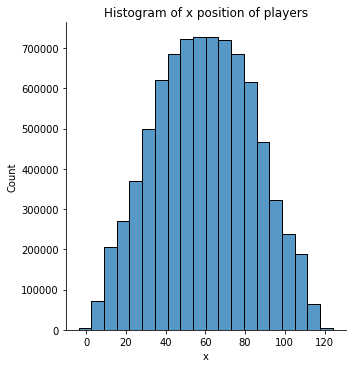

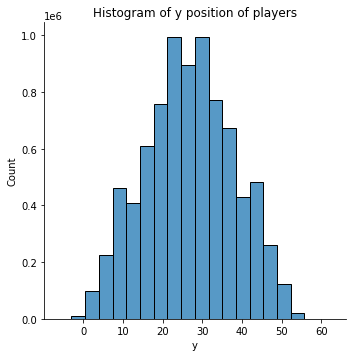

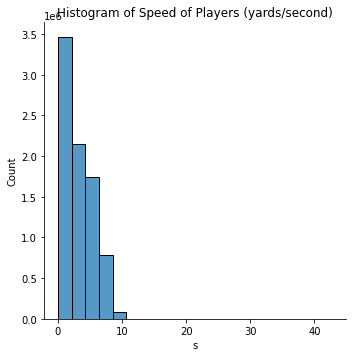

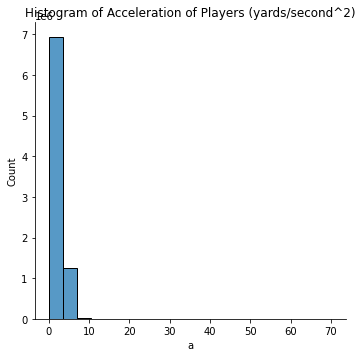

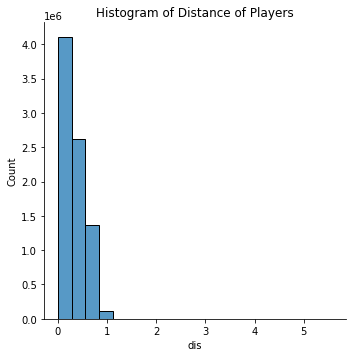

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

sns.displot(new_df['x'], label="x location", 
            kde=False, bins=20)
plt.title("Histogram of x position of players")
sns.displot(new_df['y'], label="y location", 
            kde=False, bins=20)
plt.title("Histogram of y position of players")
sns.displot(new_df['s'], label="Speed", 
            kde=False, bins=20)
plt.title("Histogram of Speed of Players (yards/second)")
sns.displot(new_df['a'], label="Acceleration", 
            kde=False, bins=20)
plt.title("Histogram of Acceleration of Players (yards/second^2)")
sns.displot(new_df['dis'], label="Distance from prior time point (yards)", 
            kde=False, bins=20)
plt.title("Histogram of Distance of Players")


plt.show()

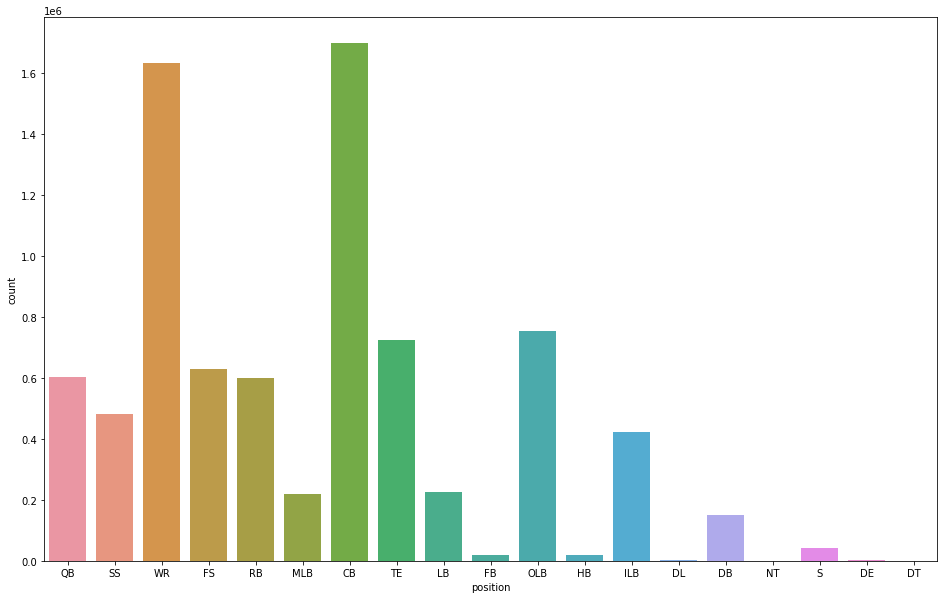

In [15]:
#Create a countplot for the number of positions that are accounted for in the data 
#As we would probably guess, the predominant position groups are the cornerbacks and 
#wide recievers. 
plt.figure(figsize = (16,10))
sns.countplot(x='position', data=new_df )
plt.show()

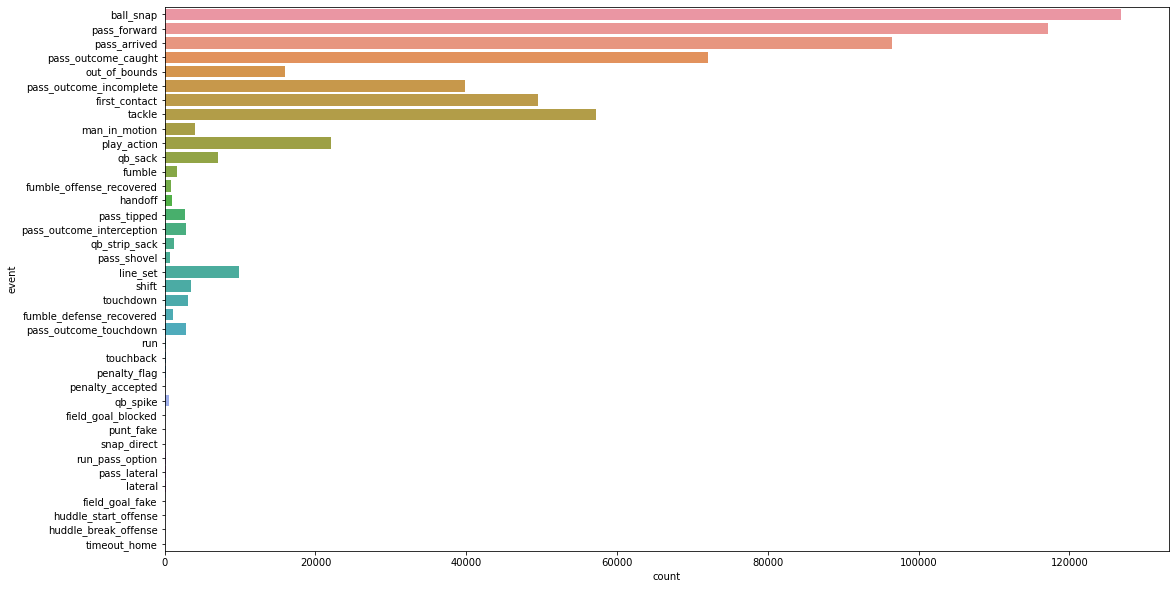

In [17]:
#Create a bar chart for the events that occurred (eliminated 'none' due to the vast amount 
#of occurences)
plt.figure(figsize = (18,10))
ax=sns.countplot(y='event', data=new_df.loc[new_df.event!='None'])
plt.show()

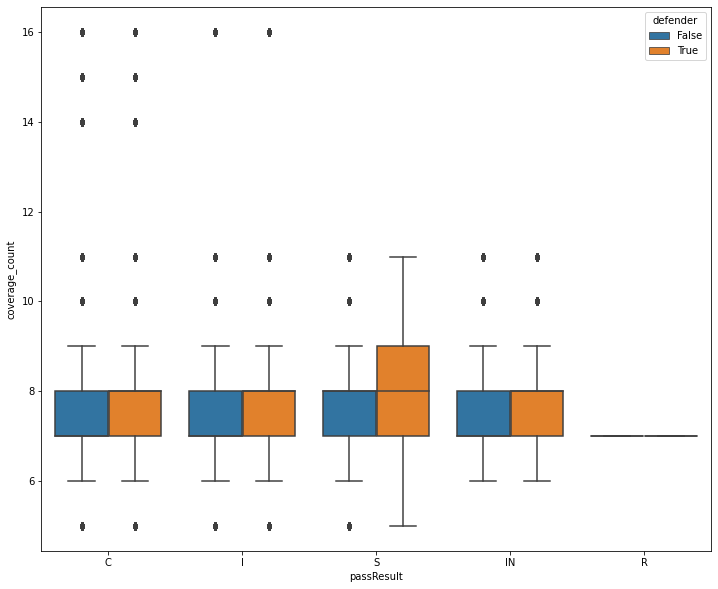

In [20]:
#Relate the completed, incomplete, sacks, to the number of defenders  
plt.figure(figsize = (12,10))
sns.boxplot(x='passResult',y='coverage_count',data =new_df,
            hue='defender')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

This boxplot essentially tells us the same information as before: For complete and incomplete passes, there was either 7 or 8 defenders on the play (see value counts code above). For sacks, interestingly enough, the amount of players in pass coverage was prediominantly between 7 and 9. 

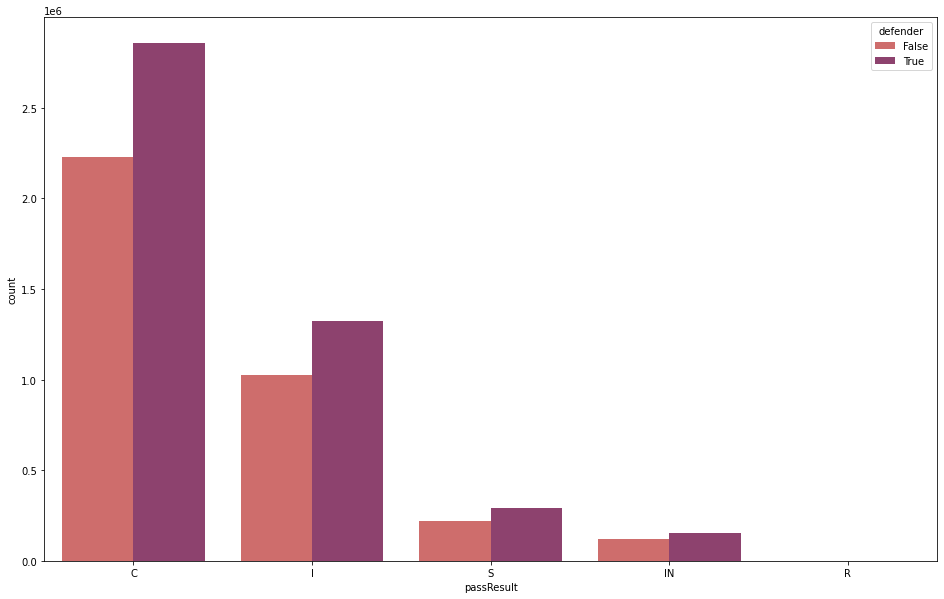

In [21]:
plt.figure(figsize = (16,10))
#sns.color_palette("Paired")
sns.countplot(x='passResult', hue='defender', data=new_df, palette="flare" )
plt.show()

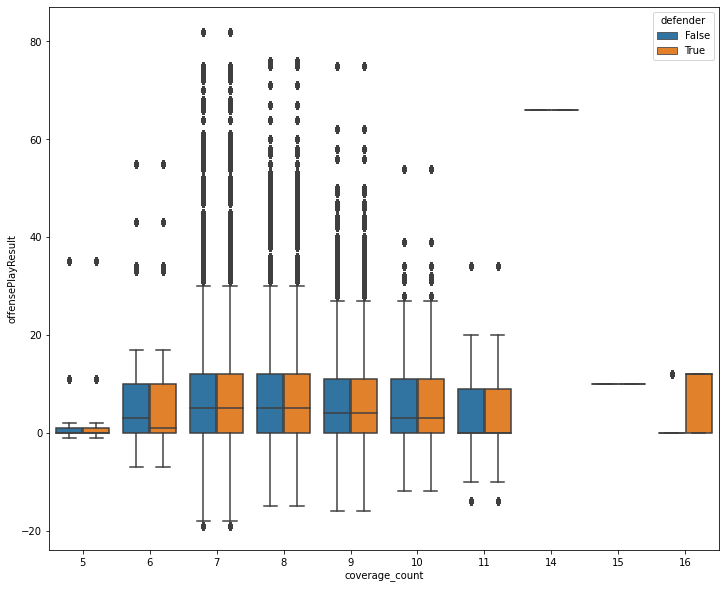

In [22]:
#Relate the completed, incomplete, sacks, to the number of defenders  
plt.figure(figsize = (12,10))
#We can see if test preparation courses had an effect on the student's overall scores
sns.boxplot(x='coverage_count',y='offensePlayResult',data =new_df,
            hue='defender')
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

It looks like when you have 7 defenders in coverage, that the median is significantly higher than the other coverage counts, but this could also be because the number of times 7 defenders were in coverage. 

As far as modeling is concerned, it looks like we may want to only include 7, 8 and 9 players on defense in the model to avoid extreme cases. We want the eventual unsupervised model to be as robust as possible. 

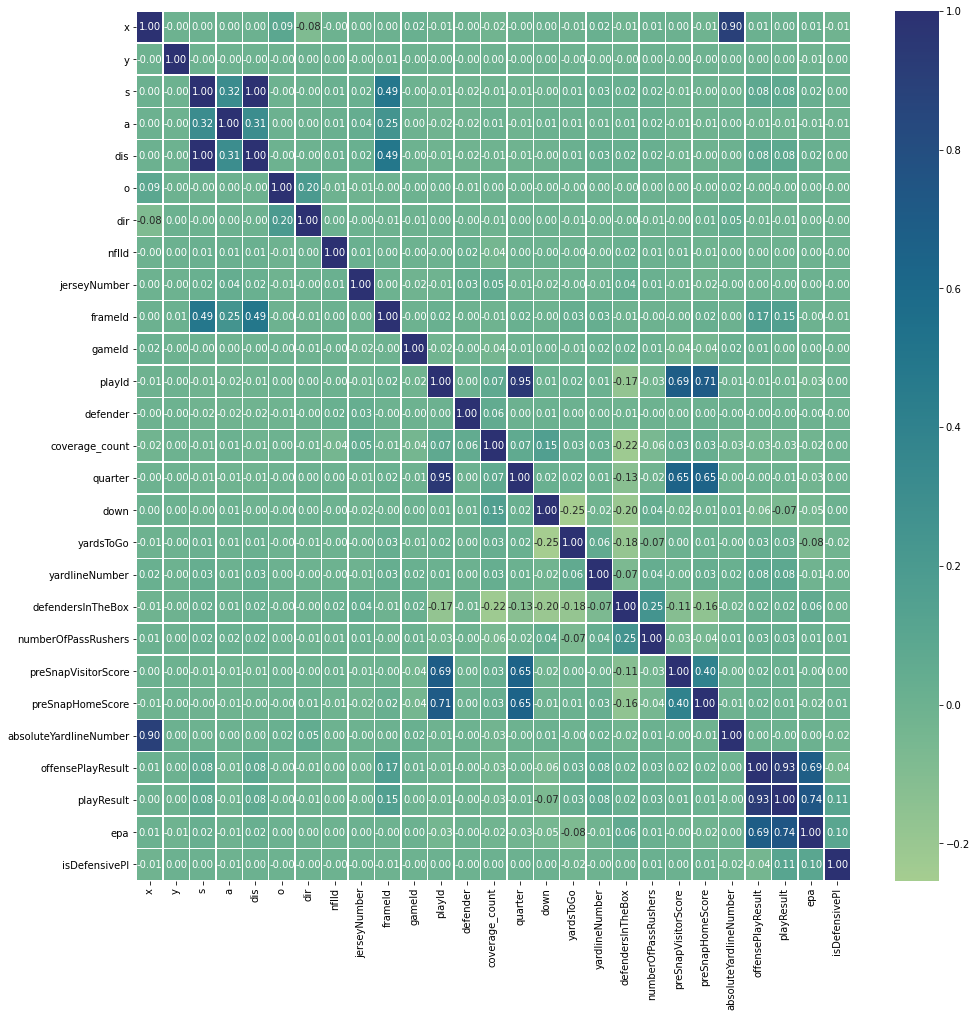

In [23]:
#create a heatmap to see if there is any relationship between the numerical variables. 
plt.figure(figsize=(16,16))
cmap=sns.color_palette("crest", as_cmap=True)
sns.heatmap(new_df.corr(), annot=True, fmt = ".2f", linewidth=0.5, cmap=cmap)
plt.show()
#highest val

This heatmap shows that there is some correlation between a few of the variables. So when choosing the model for our defensive penalty or play coverage problems, we will need to be careful about some multicollinearity that can occur. 